# 🌍 Predicting Human Life Expectancy Based on Environment & Lifestyle 🚀

## 
📌 Project Overview:
- This project utilizes various regression techniques to predict human life expectancy based on environmental and lifestyle factors. 
- The dataset includes key indicators such as healthcare access, economic conditions, pollution levels, and lifestyle cho."""


In [3]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/shr130/Life-Expectancy-Prediction/main/Life%20Expectancy%20Data.csv")

In [5]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
# Remove leading/trailing spaces in column names
df.columns = df.columns.str.strip()

In [8]:
df = df.drop(columns=['Country', 'Year', 'Population'])  # Keep the other columns

In [9]:
df.describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,27.700000,28.600000,0.948000,20.700000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           2938 non-null   object 
 1   Life expectancy                  2928 non-null   float64
 2   Adult Mortality                  2928 non-null   float64
 3   infant deaths                    2938 non-null   int64  
 4   Alcohol                          2744 non-null   float64
 5   percentage expenditure           2938 non-null   float64
 6   Hepatitis B                      2385 non-null   float64
 7   Measles                          2938 non-null   int64  
 8   BMI                              2904 non-null   float64
 9   under-five deaths                2938 non-null   int64  
 10  Polio                            2919 non-null   float64
 11  Total expenditure                2712 non-null   float64
 12  Diphtheria          

In [11]:
df.isnull().sum()

Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

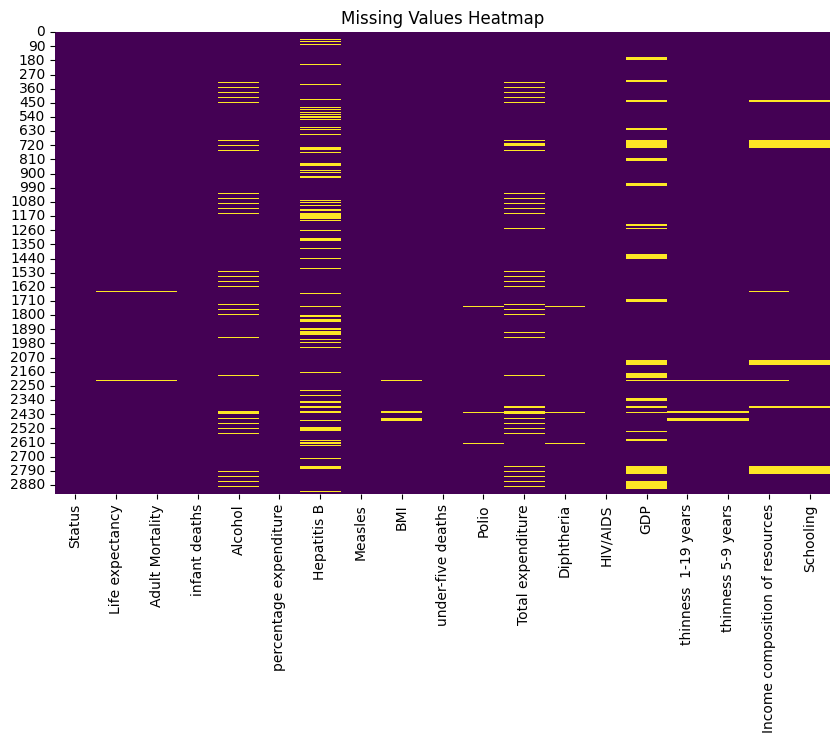

In [12]:
# Heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

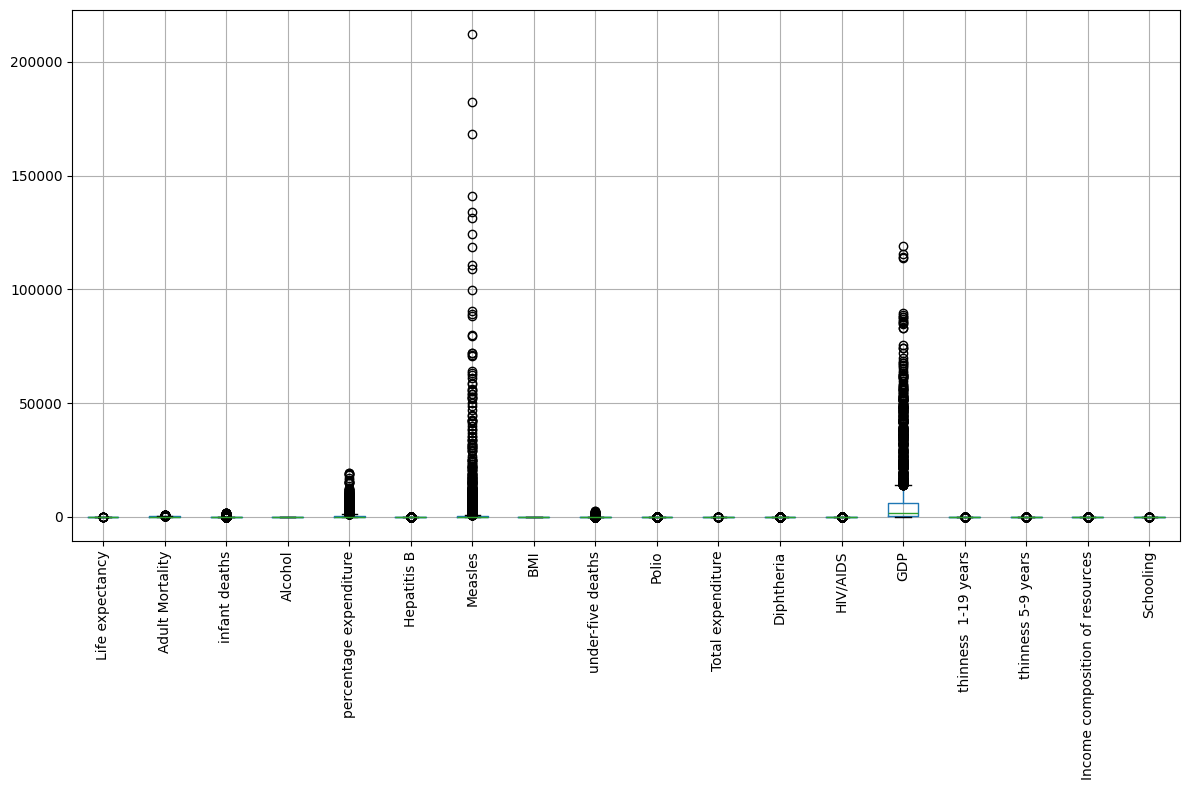

In [13]:
# Boxplot for outlier detection
plt.figure(figsize=(12, 8))
df.boxplot()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

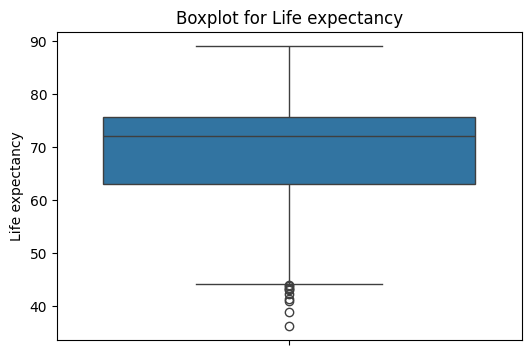

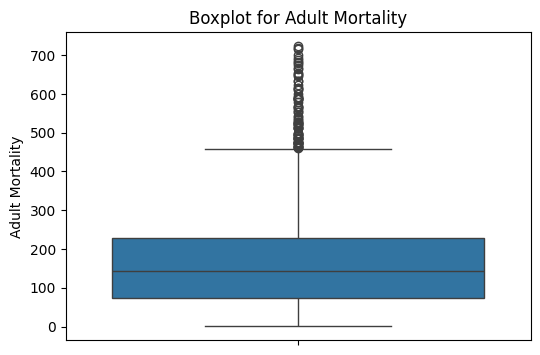

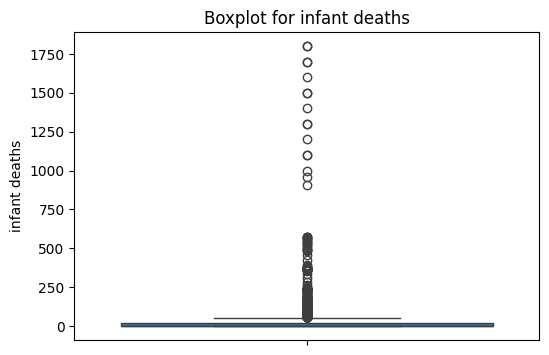

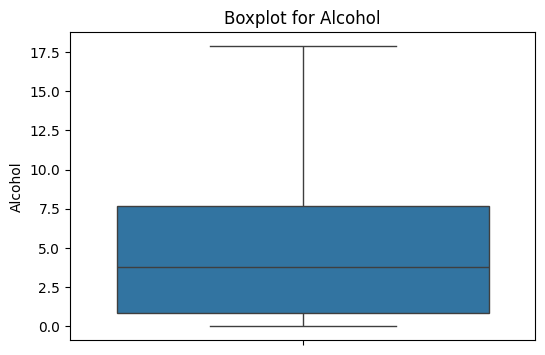

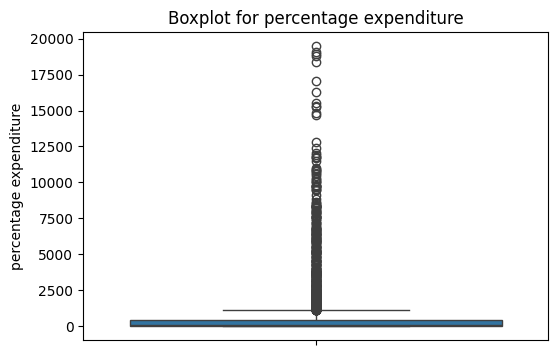

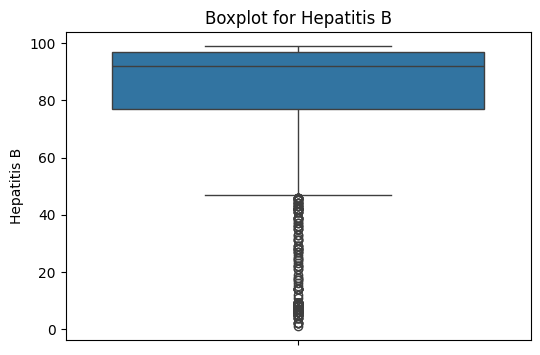

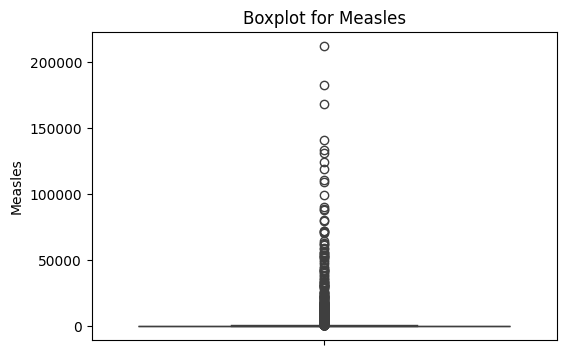

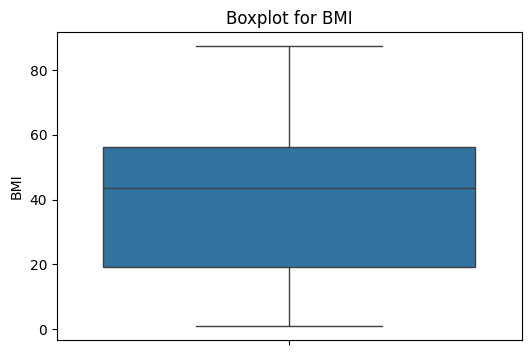

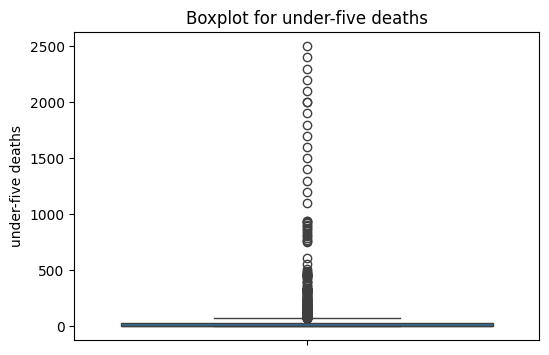

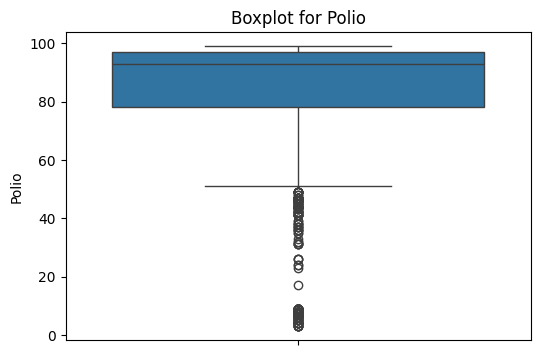

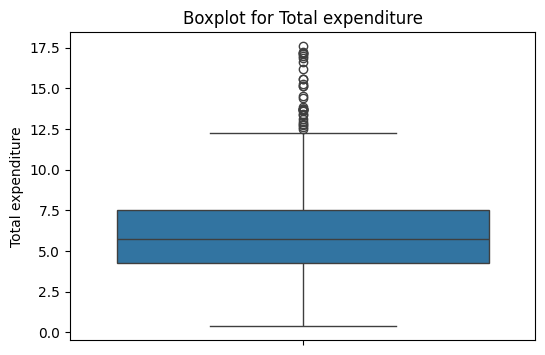

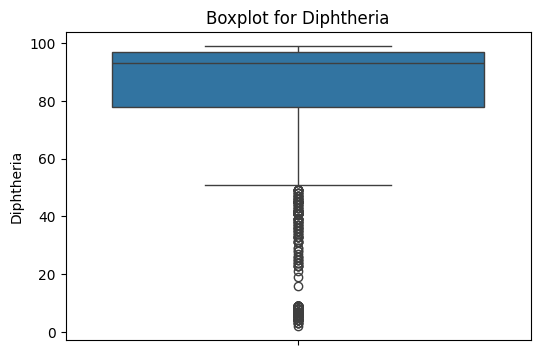

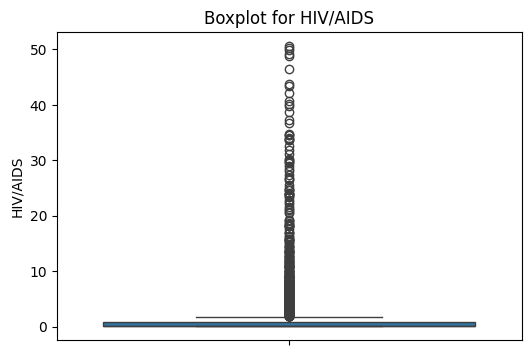

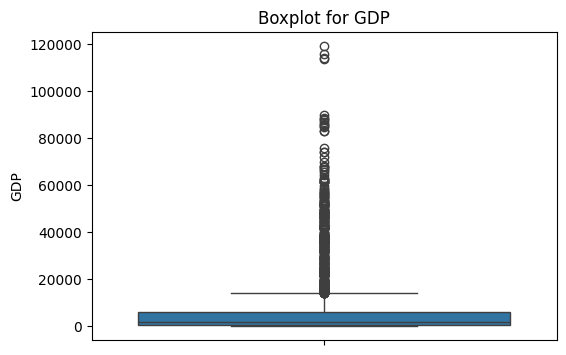

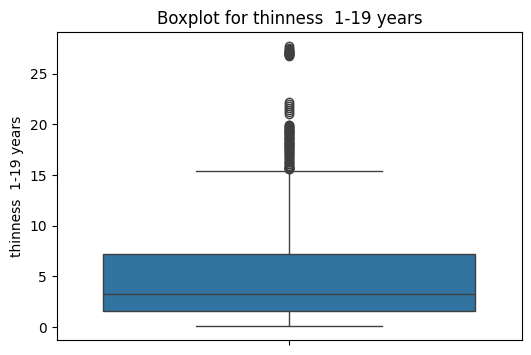

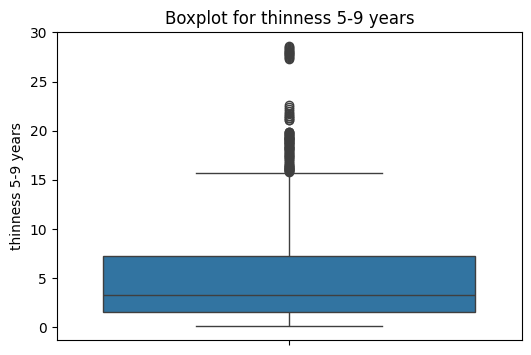

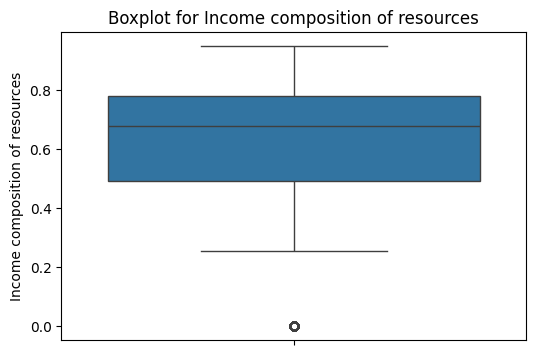

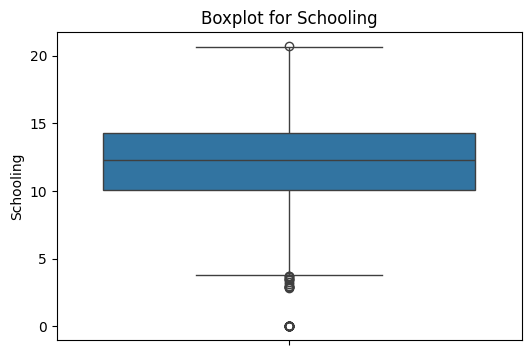

In [14]:
# Boxplot for each column separately
columns_to_treat = df.select_dtypes(include=['float64', 'int64']).columns
for column in columns_to_treat:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

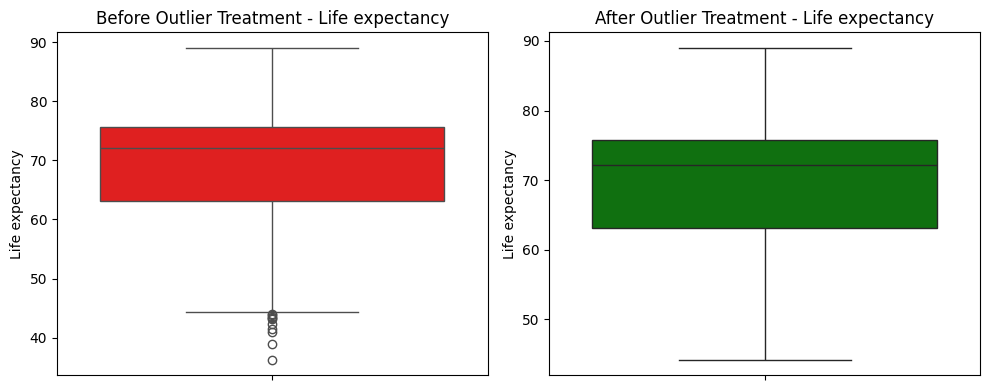

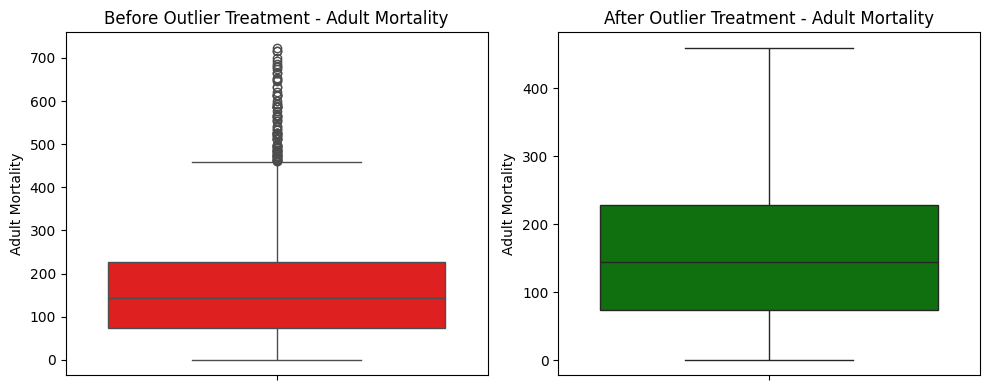

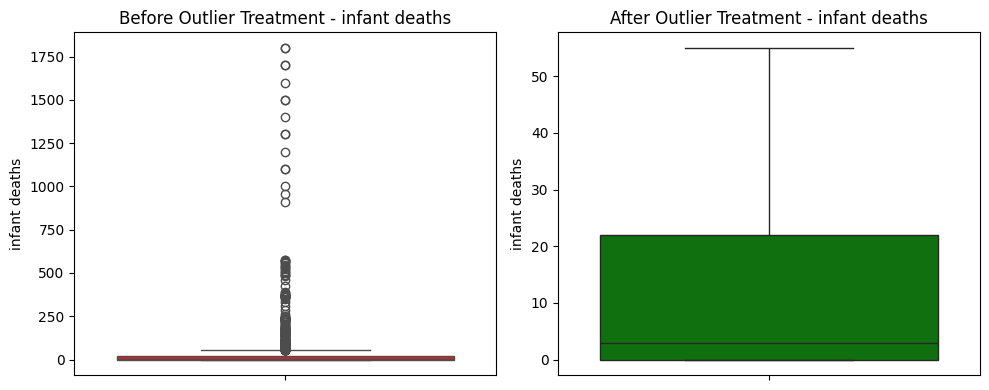

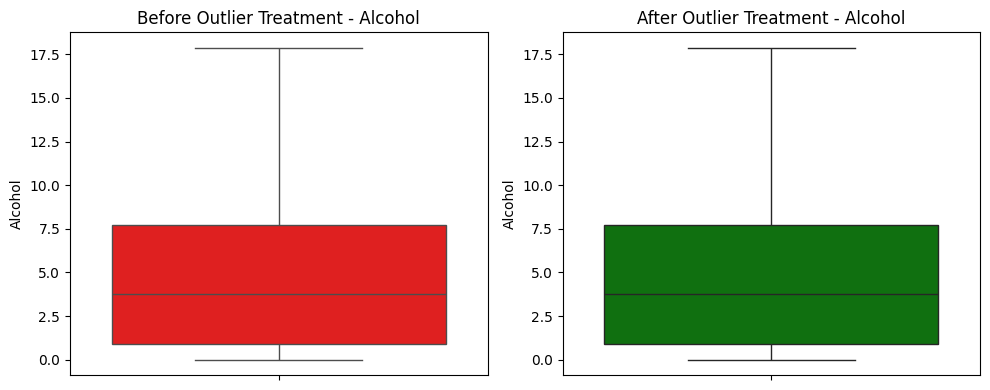

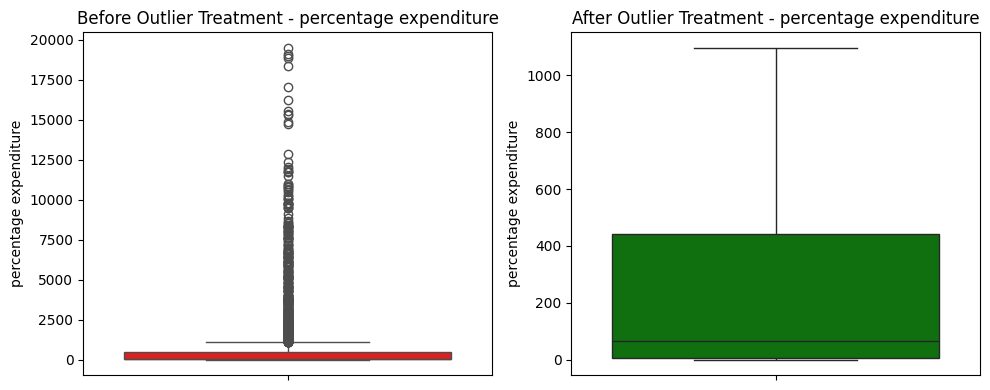

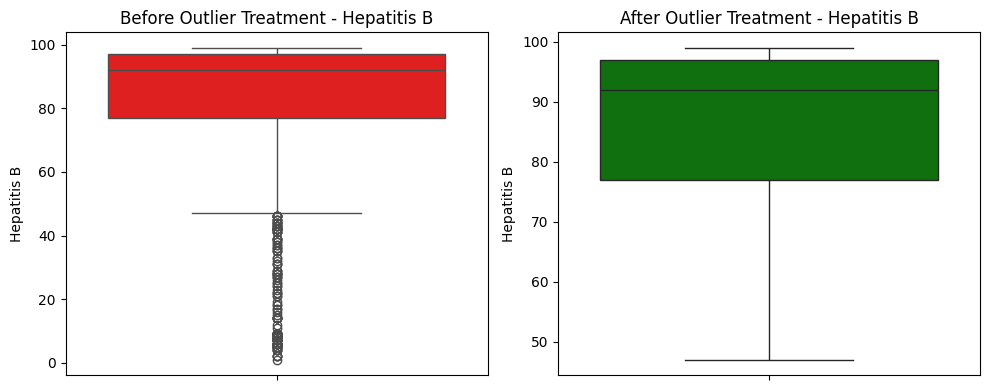

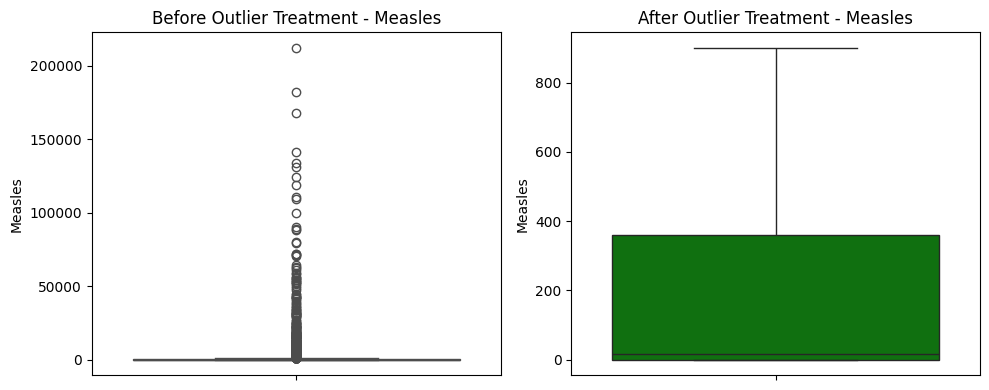

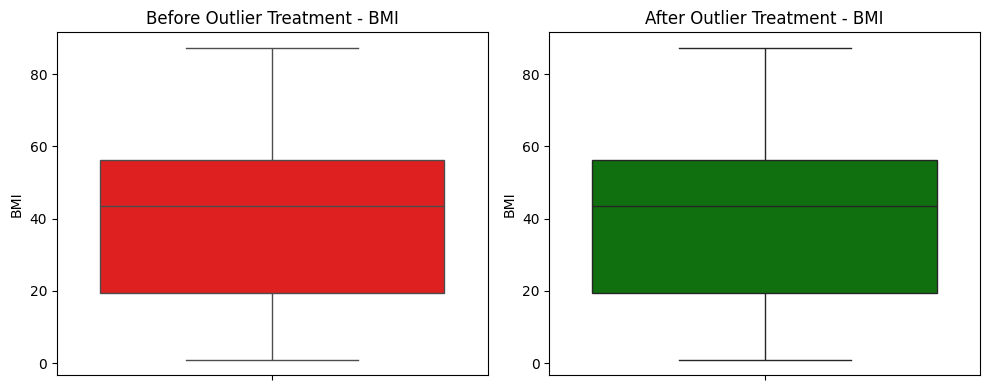

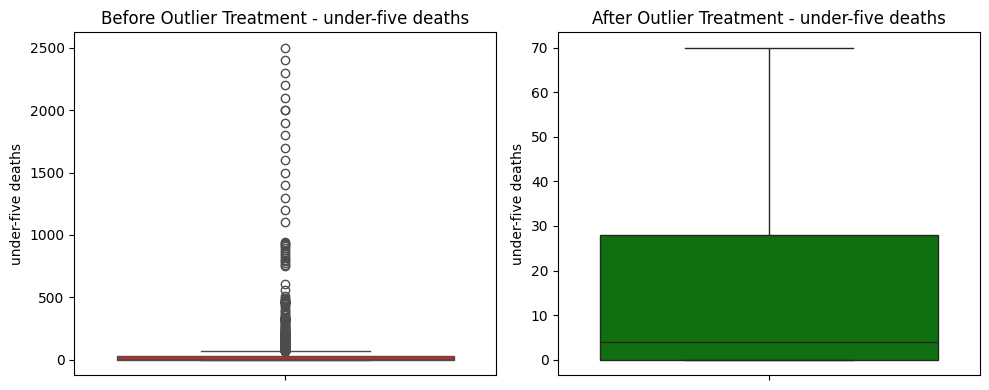

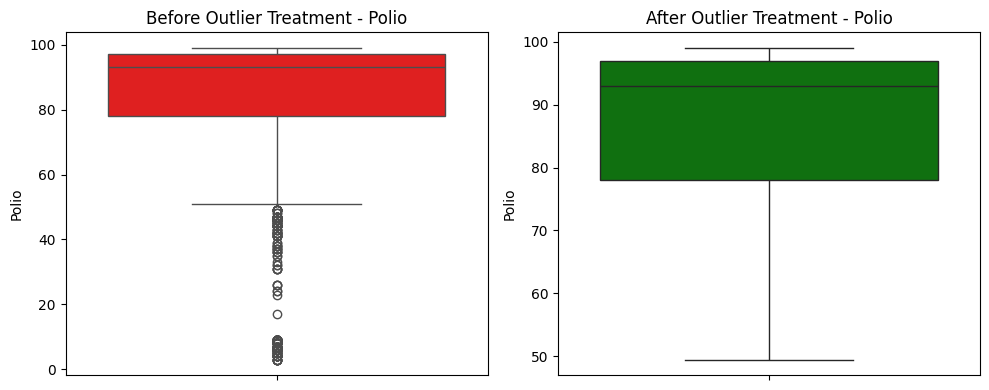

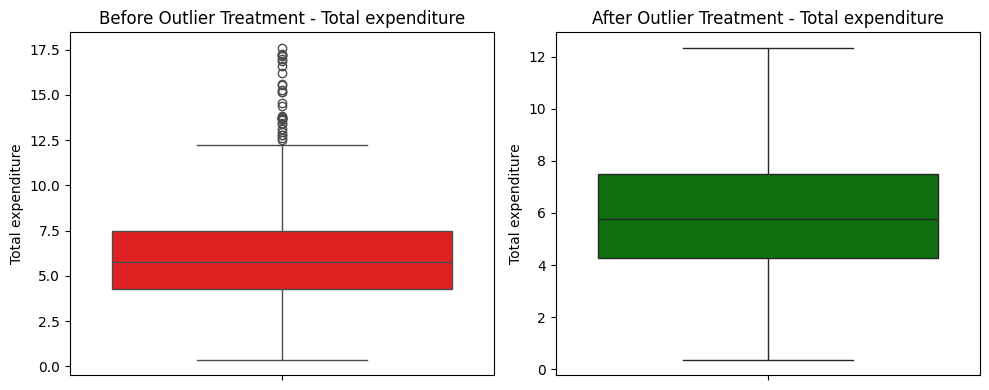

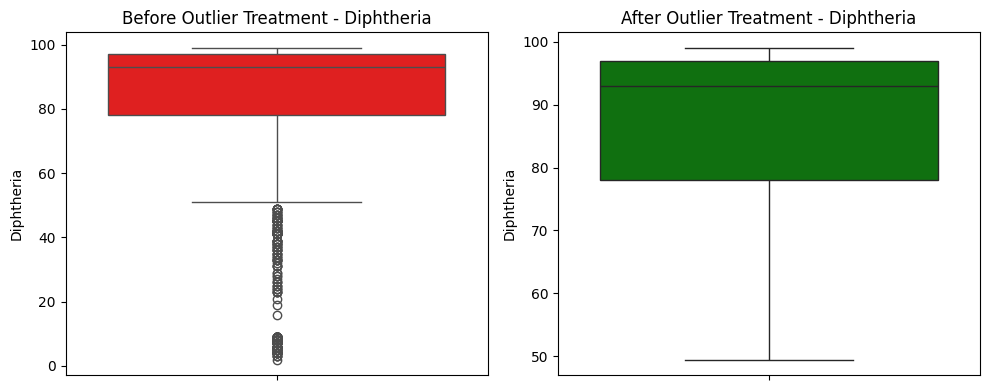

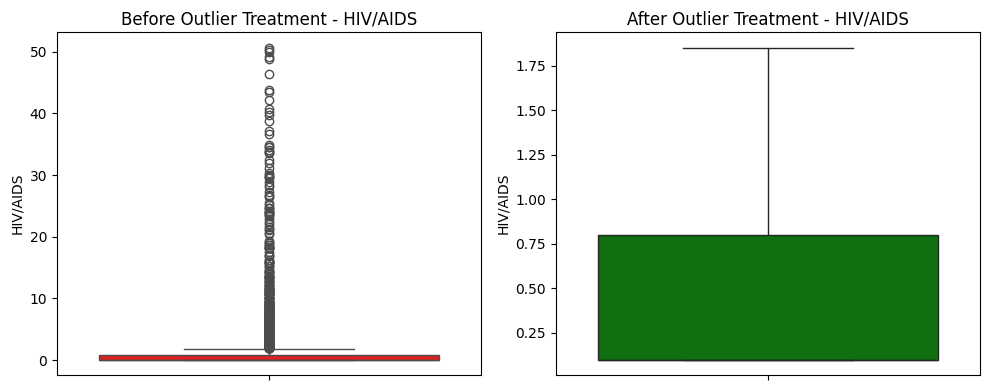

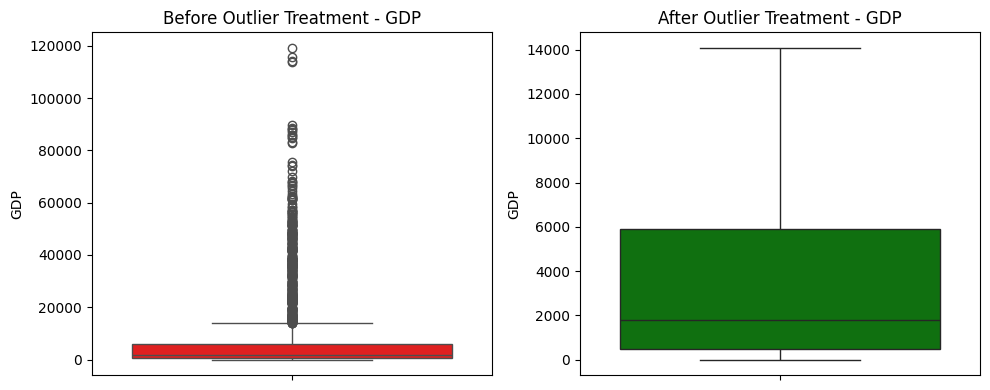

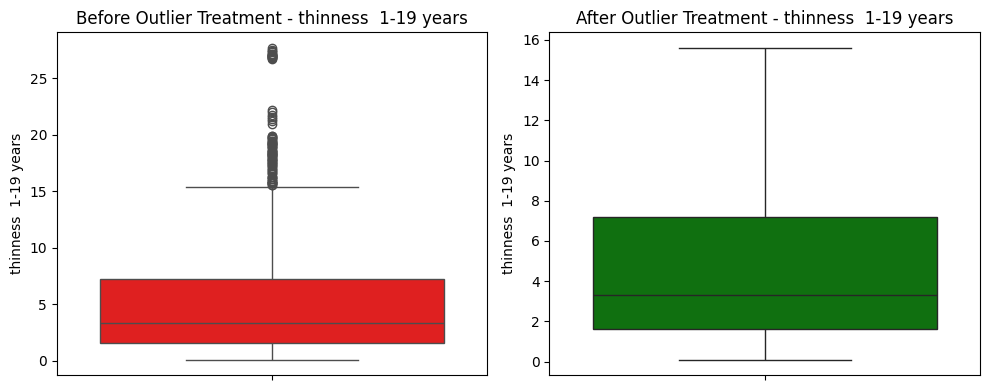

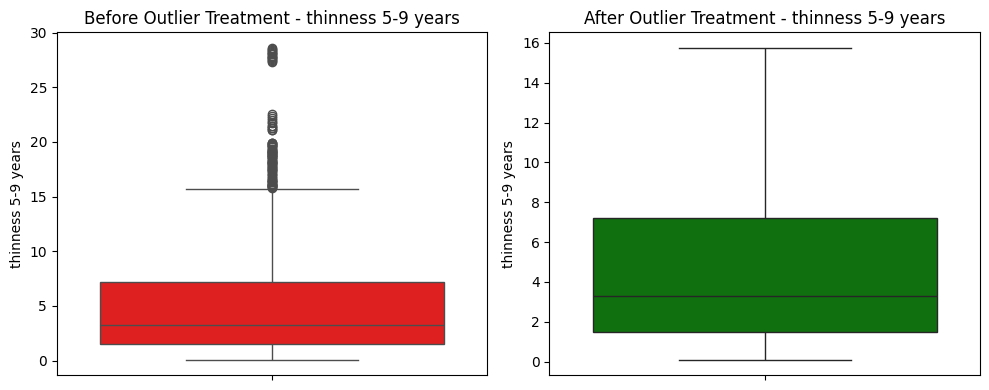

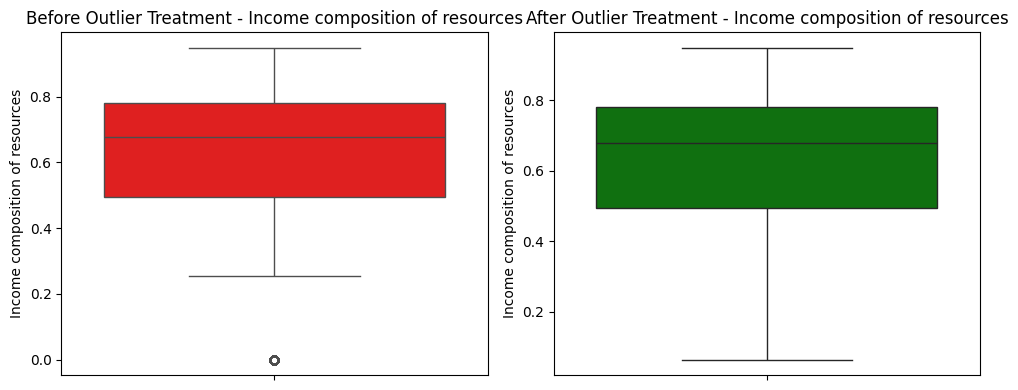

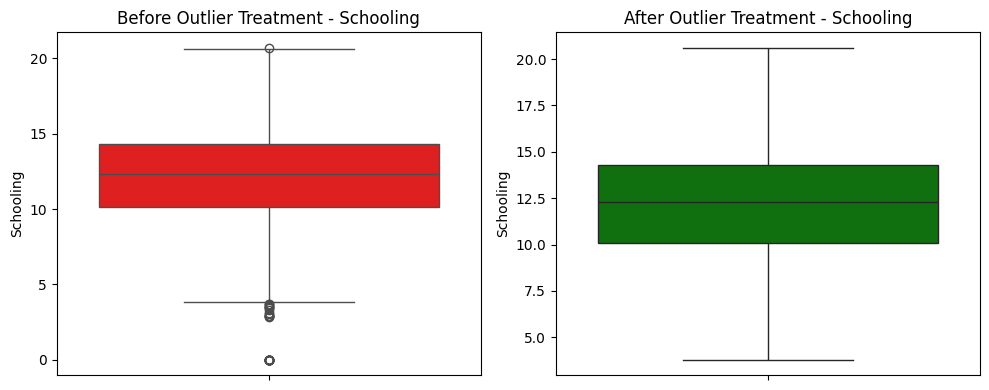

In [15]:
# Define function to handle outliers using IQR method
def handle_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers instead of removing them
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Select only numerical columns
num_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot before and after outlier treatment
for column in num_columns:
    plt.figure(figsize=(10, 4))

    # Before treatment
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[column], color='red')
    plt.title(f'Before Outlier Treatment - {column}')

    # Apply outlier handling
    handle_outliers(df, column)

    # After treatment
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[column], color='green')
    plt.title(f'After Outlier Treatment - {column}')

    plt.tight_layout()
    plt.show()


In [16]:
# Handle missing values using median imputation
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].median())

In [17]:
df.isnull().sum()

Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [18]:
# Encode categorical variables
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])

In [19]:
df.head()

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1,65.0,263.0,55.0,0.01,71.279624,65.0,900.625,19.1,70.0,49.5,8.16,65.0,0.1,584.259210,15.6,15.75,0.479,10.1
1,1,59.9,271.0,55.0,0.01,73.523582,62.0,492.000,18.6,70.0,58.0,8.18,62.0,0.1,612.696514,15.6,15.75,0.476,10.0
2,1,59.9,268.0,55.0,0.01,73.219243,64.0,430.000,18.1,70.0,62.0,8.13,64.0,0.1,631.744976,15.6,15.75,0.470,9.9
3,1,59.5,272.0,55.0,0.01,78.184215,67.0,900.625,17.6,70.0,67.0,8.52,67.0,0.1,669.959000,15.6,15.75,0.463,9.8
4,1,59.2,275.0,55.0,0.01,7.097109,68.0,900.625,17.2,70.0,68.0,7.87,68.0,0.1,63.537231,15.6,15.75,0.454,9.5


<Figure size 1200x600 with 0 Axes>

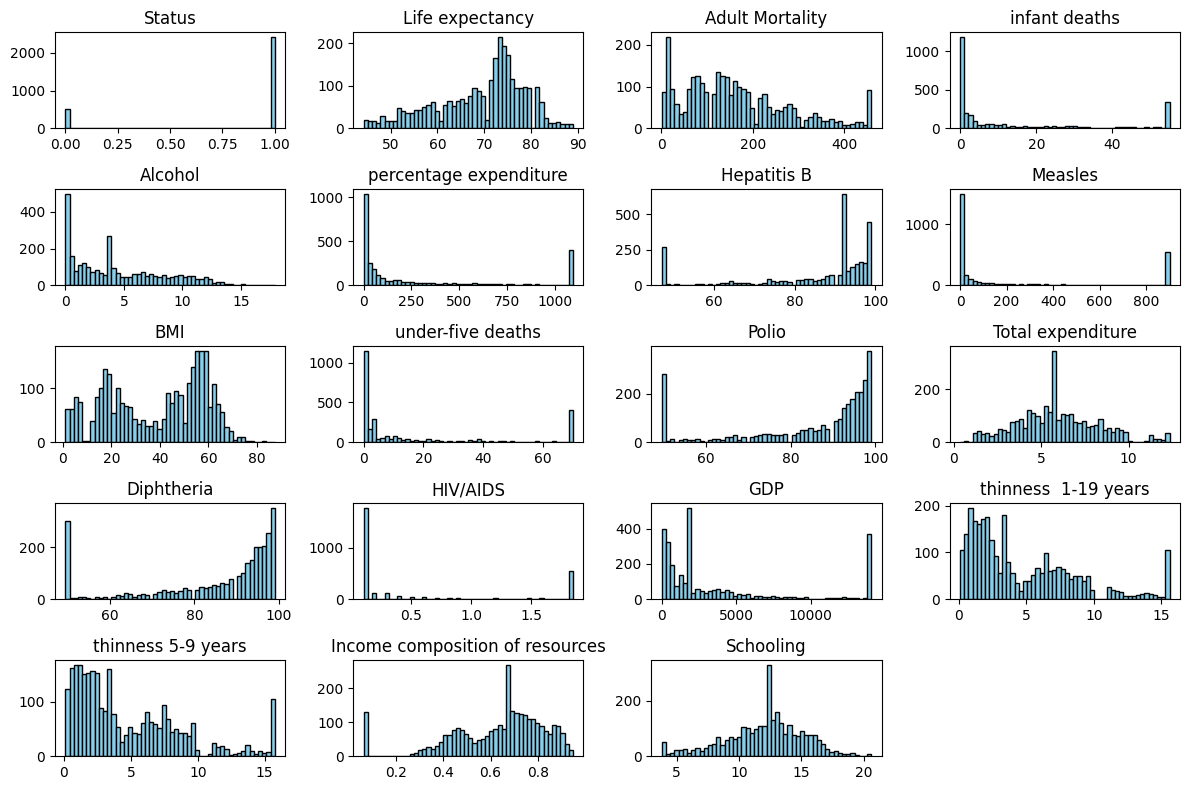

In [20]:
plt.figure(figsize=(12, 6))

# Plot histogram for all numerical columns
df.hist(bins=50, figsize=(12, 8), color='skyblue', edgecolor='black', grid=False)

# Improve layout
plt.tight_layout()
plt.show()

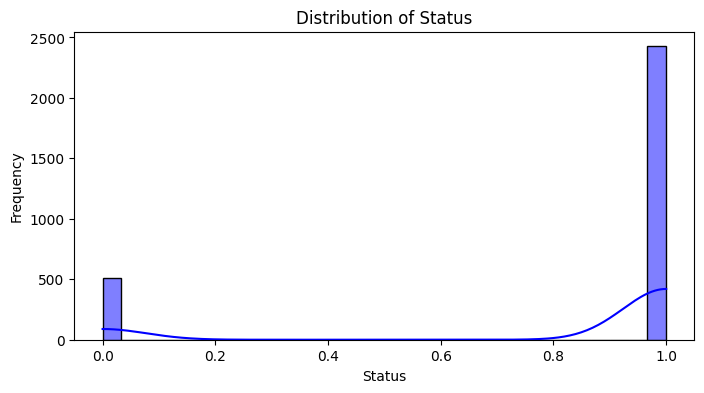

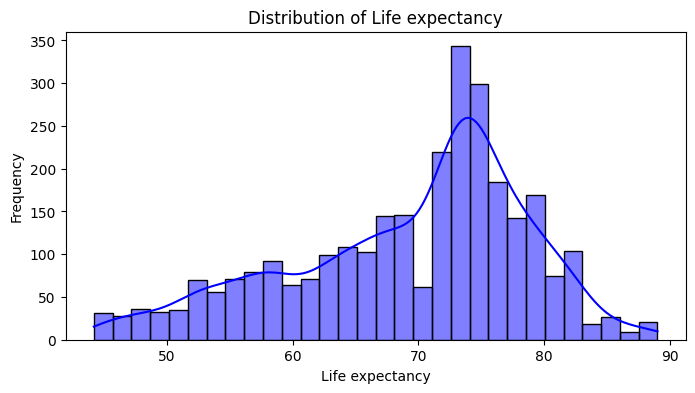

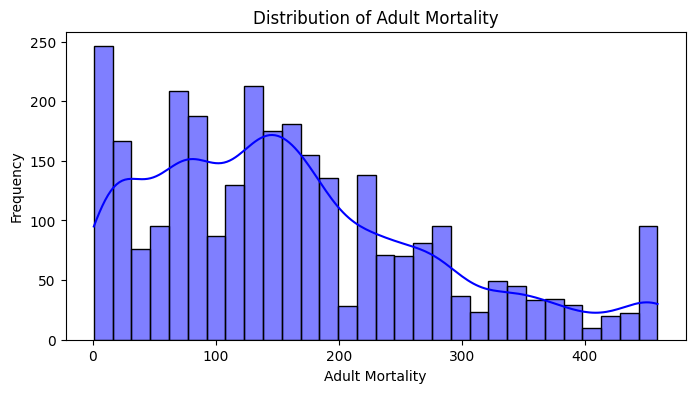

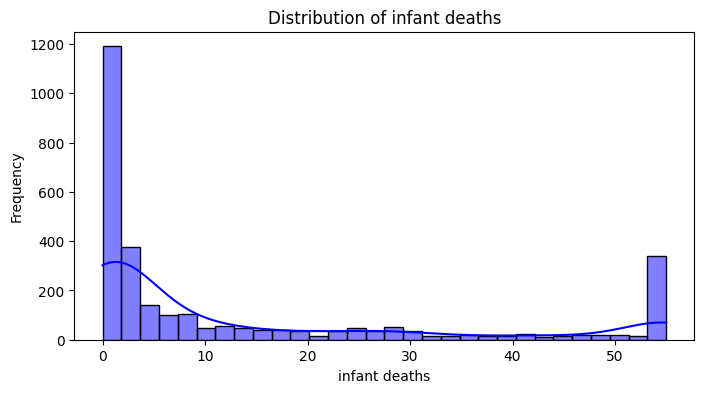

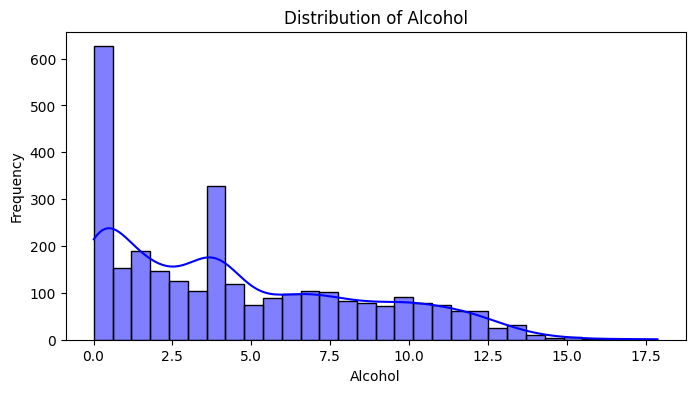

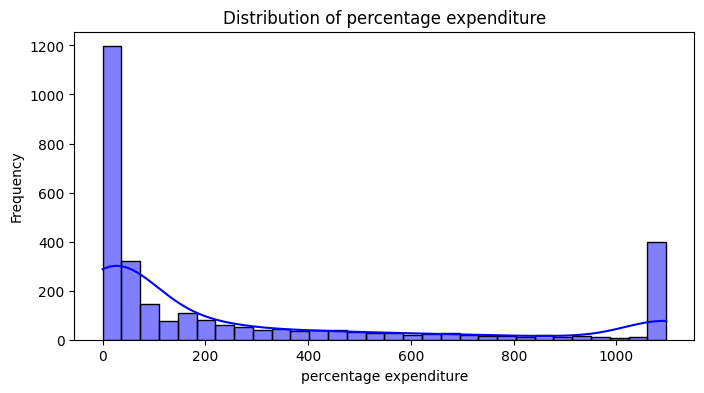

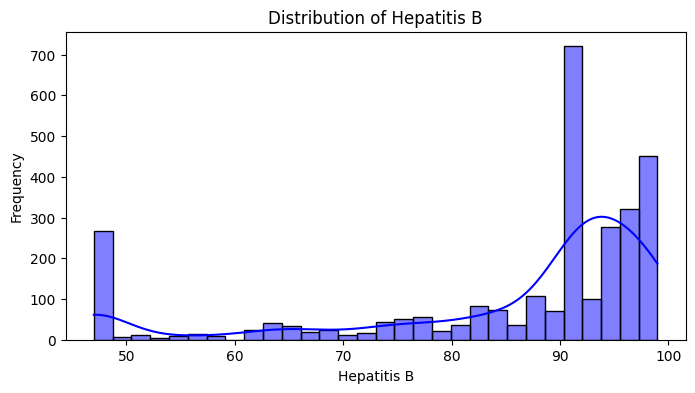

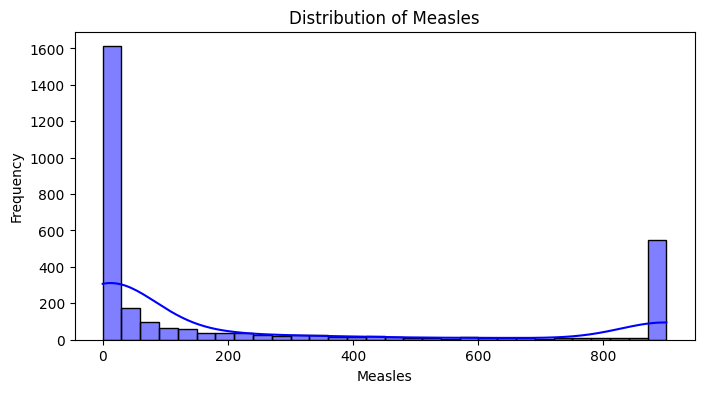

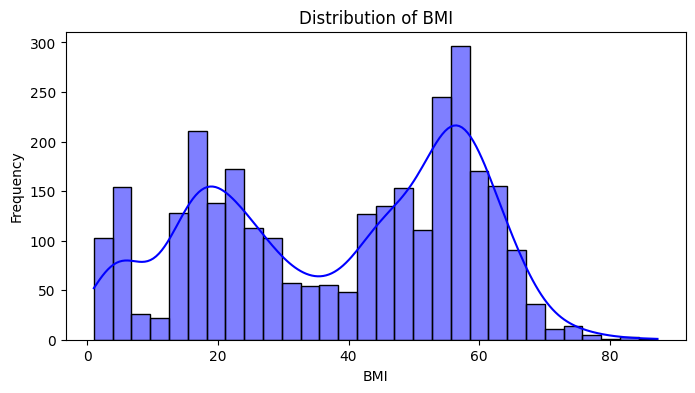

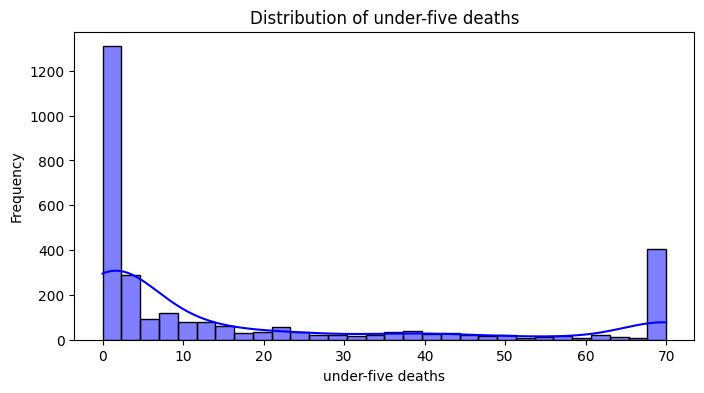

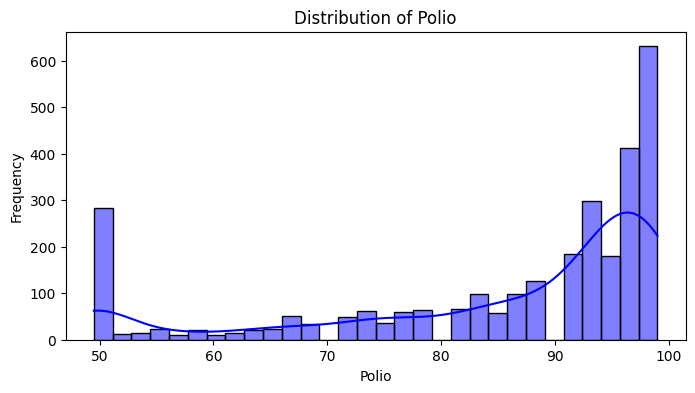

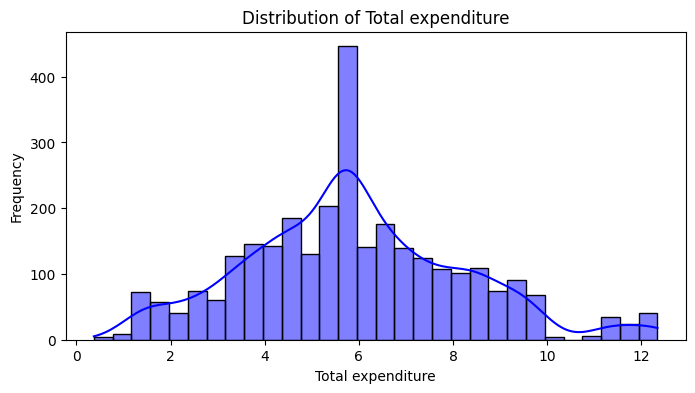

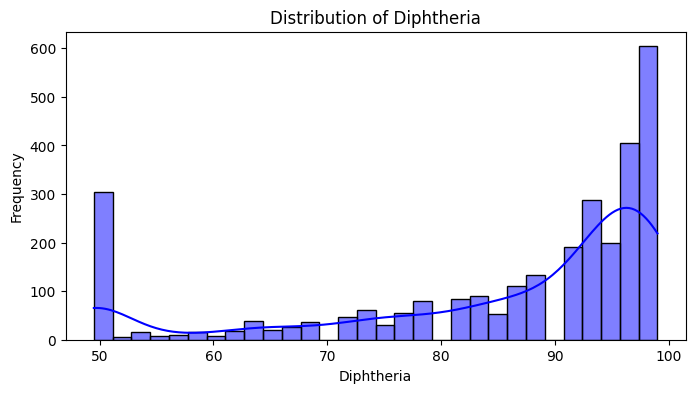

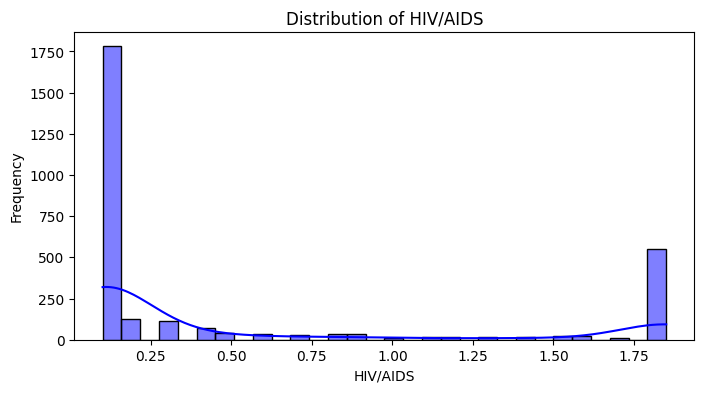

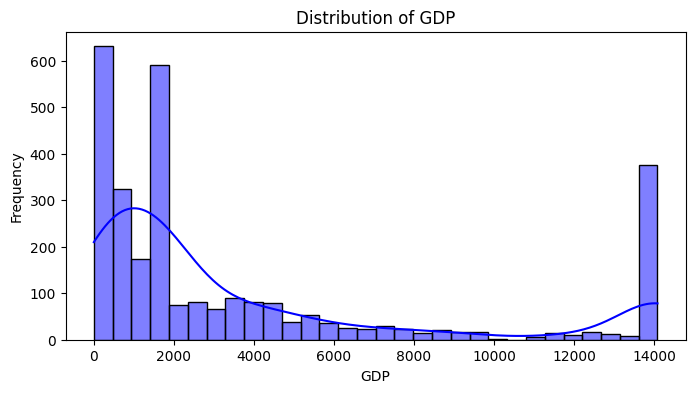

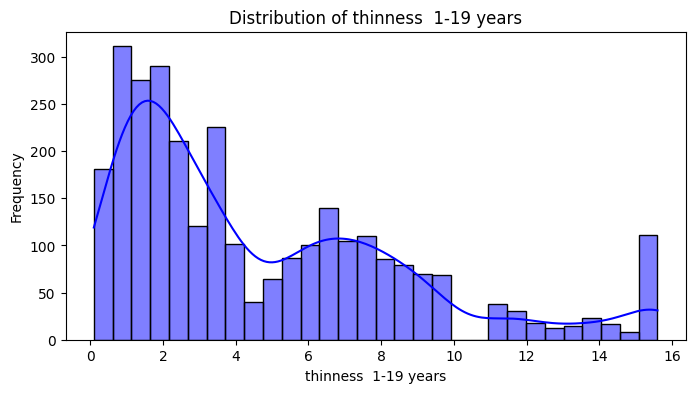

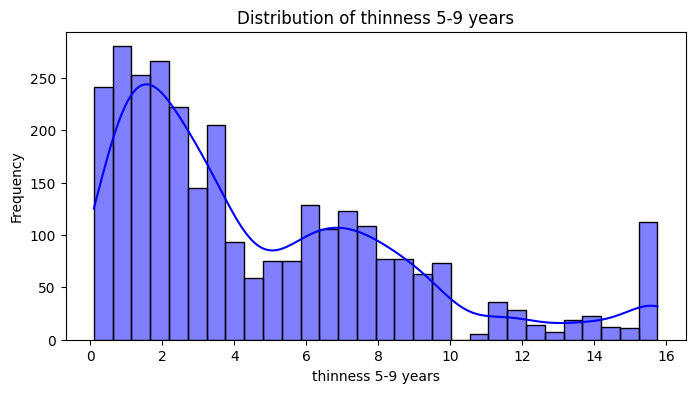

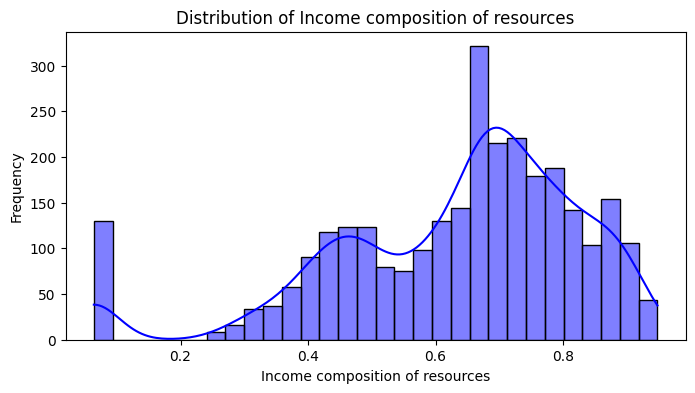

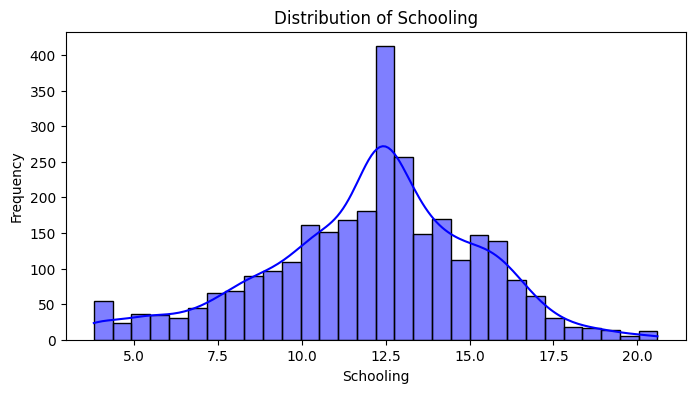

In [21]:
# Identify numeric columns
continuous_columns = df.select_dtypes(include=np.number).columns

# Plot distributions
for col in continuous_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

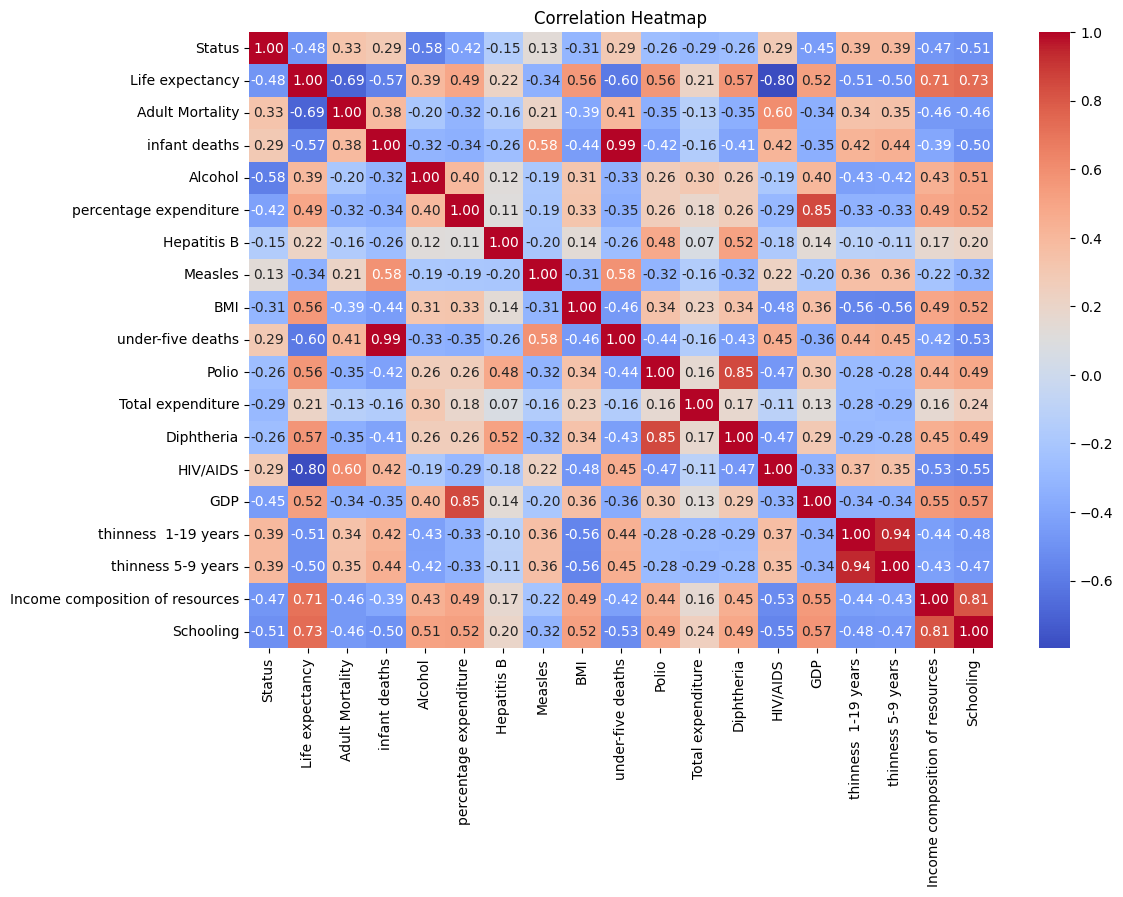

In [22]:
# Correlation matrix and heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [23]:
# Separate features and target
X = df.drop(columns=['Life expectancy'])
y = df['Life expectancy']

In [24]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# Split dataset into training and testing sets (80:20 ratio)
xtrain, xtest, ytrain, ytest = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [26]:
# Function to evaluate models with cross-validation
def evaluate_model(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)

    # Cross-validation score
    cv_scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='r2')

    # Model performance metrics
    train_r2 = model.score(xtrain, ytrain)
    test_r2 = model.score(xtest, ytest)
    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    r2 = r2_score(ytest, ypred)

    # Print results
    print(f"{model.__class__.__name__}:")
    print(f"  Train R²: {train_r2:.4f}")
    print(f"  Test R²: {test_r2:.4f}")
    print(f"  Cross-validation R²: {cv_scores.mean():.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  R² Score: {r2:.4f}")
    print("=" * 50)

In [27]:
# Define models with regularization and tuning
models = [
    Ridge(alpha=1.0),
    Lasso(alpha=0.1),
    ElasticNet(alpha=0.1, l1_ratio=0.7),
    DecisionTreeRegressor(max_depth=10, random_state=42),
    RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    SVR(kernel='rbf', C=1.0, epsilon=0.1),
    KNeighborsRegressor(n_neighbors=5)
]

In [28]:
# Evaluate each model
for model in models:
    evaluate_model(model)

Ridge:
  Train R²: 0.8507
  Test R²: 0.8577
  Cross-validation R²: 0.8463
  Mean Absolute Error (MAE): 2.6595
  Mean Squared Error (MSE): 12.3267
  R² Score: 0.8577
Lasso:
  Train R²: 0.8465
  Test R²: 0.8544
  Cross-validation R²: 0.8427
  Mean Absolute Error (MAE): 2.6553
  Mean Squared Error (MSE): 12.6071
  R² Score: 0.8544
ElasticNet:
  Train R²: 0.8465
  Test R²: 0.8562
  Cross-validation R²: 0.8428
  Mean Absolute Error (MAE): 2.6438
  Mean Squared Error (MSE): 12.4528
  R² Score: 0.8562
DecisionTreeRegressor:
  Train R²: 0.9870
  Test R²: 0.9223
  Cross-validation R²: 0.9090
  Mean Absolute Error (MAE): 1.6475
  Mean Squared Error (MSE): 6.7310
  R² Score: 0.9223
RandomForestRegressor:
  Train R²: 0.9873
  Test R²: 0.9632
  Cross-validation R²: 0.9514
  Mean Absolute Error (MAE): 1.2275
  Mean Squared Error (MSE): 3.1863
  R² Score: 0.9632
GradientBoostingRegressor:
  Train R²: 0.9555
  Test R²: 0.9466
  Cross-validation R²: 0.9348
  Mean Absolute Error (MAE): 1.5606
  Mean Squ

In [29]:
# Hyperparameter tuning for Random Forest using RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 5, 10],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

In [30]:
# Fit RandomizedSearchCV
random_search.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 10],
                                        'min_samples_split': [5, 10, 15],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='r2')

In [31]:
# Best Model Evaluation
best_rf = random_search.best_estimator_
evaluate_model(best_rf)

RandomForestRegressor:
  Train R²: 0.9972
  Test R²: 0.9696
  Cross-validation R²: 0.9582
  Mean Absolute Error (MAE): 1.0383
  Mean Squared Error (MSE): 2.6322
  R² Score: 0.9696


In [32]:
import pandas as pd

# If xtrain is an array, use feature names from the original dataset
feature_names = df.drop(columns=['Life expectancy']).columns 

importances = best_rf.feature_importances_
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display top 10 important features
print(feature_importance.head(10))

                            Feature  Importance
12                         HIV/AIDS    0.202729
1                   Adult Mortality    0.185482
16  Income composition of resources    0.183274
17                        Schooling    0.106122
7                               BMI    0.063760
8                 under-five deaths    0.048010
15               thinness 5-9 years    0.045936
2                     infant deaths    0.029333
14             thinness  1-19 years    0.028847
11                       Diphtheria    0.020641


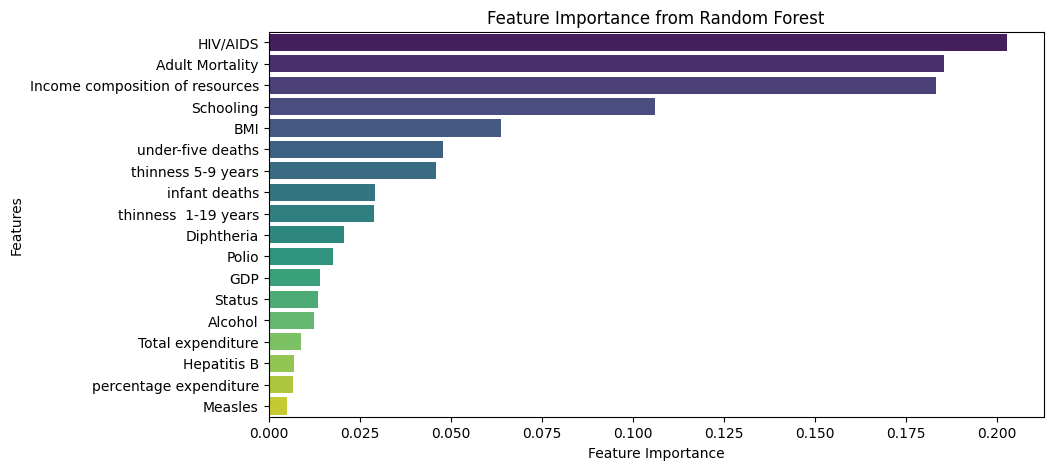

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort feature importance in descending order
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance["Importance"], y=feature_importance["Feature"], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest")
plt.show()


In [34]:
feature_importance

,Feature,Importance
12,HIV/AIDS,0.202729
1,Adult Mortality,0.185482
16,Income composition of resources,0.183274
17,Schooling,0.106122
7,BMI,0.063760
8,under-five deaths,0.048010
15,thinness 5-9 years,0.045936
2,infant deaths,0.029333
14,thinness 1-19 years,0.028847
11,Diphtheria,0.020641


In [35]:
# Convert xtrain and xtest to DataFrame if they are NumPy arrays
if isinstance(xtrain, np.ndarray):
    xtrain = pd.DataFrame(xtrain, columns=feature_importance["Feature"])
    xtest = pd.DataFrame(xtest, columns=feature_importance["Feature"])

# Filter out low-importance features
selected_features = feature_importance[feature_importance["Importance"] > 0.02]["Feature"].tolist()
xtrain_selected = xtrain[selected_features]
xtest_selected = xtest[selected_features]


In [36]:
best_rf.fit(xtrain_selected, ytrain)
evaluate_model(best_rf)

RandomForestRegressor:
  Train R²: 0.9972
  Test R²: 0.9696
  Cross-validation R²: 0.9582
  Mean Absolute Error (MAE): 1.0383
  Mean Squared Error (MSE): 2.6322
  R² Score: 0.9696


In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [10, 20, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 5],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1)

grid_search.fit(xtrain_selected, ytrain)
best_rf = grid_search.best_estimator_
evaluate_model(best_rf)

RandomForestRegressor:
  Train R²: 0.9875
  Test R²: 0.9651
  Cross-validation R²: 0.9502
  Mean Absolute Error (MAE): 1.1592
  Mean Squared Error (MSE): 3.0270
  R² Score: 0.9651


import pickle
pickle.dump(best_rf, open("best_model.pkl", 'wb'))
print("Model saved as 'best_model.pkl'")

In [39]:
import pickle
import gzip

with gzip.open("best_model.pkl.gz", 'wb') as f:
    pickle.dump(best_rf, f)

print("Model saved as 'best_model.pkl.gz'")

Model saved as 'best_model.pkl.gz'
